In [274]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [275]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [276]:
trial_idx=1
paper='2008.08998'

# Code-generation prompts

In [277]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [278]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [279]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, I need to analyze the
Alright, I need to analyze the Hamiltonian provided and create a HartreeFockHamiltonian class. Let me go through the questions one by one.

## QUESTION 1: Dimension and Basis Order
From the Hamiltonian equation, I can identify the following flavors:
- s: spin (which seems to have two values, likely up and down)
- q: reciprocal lattice vectors of the folded Brillouin zone, specified to be the three high-symmetry points (Γ, K, K')

So, there are 2 spin states and 3 reciprocal lattice vector states. This gives us D = (2, 3).

The basis order would be:
- Flavor type 0: spin. Takes values up (0) and down (1).
- Flavor type 1: reciprocal lattice vector. Takes values Γ (0), K (1), and K' (2).

## QUESTION 2: Identifying Interacting Terms
Let's identify the expectation value dependent terms:

1. From the Hartree term:
   `<c_q_α,s^†(p_α) c_q_δ,s(p_α)>`

2. From the Fock term:
   `<c_q_α,s^†(p_α) c_q_γ,s'(p_α)>`

In [280]:
print(generated_code['thinking'])

Alright, I need to analyze the Hamiltonian provided and create a HartreeFockHamiltonian class. Let me go through the questions one by one.

## QUESTION 1: Dimension and Basis Order
From the Hamiltonian equation, I can identify the following flavors:
- s: spin (which seems to have two values, likely up and down)
- q: reciprocal lattice vectors of the folded Brillouin zone, specified to be the three high-symmetry points (Γ, K, K')

So, there are 2 spin states and 3 reciprocal lattice vector states. This gives us D = (2, 3).

The basis order would be:
- Flavor type 0: spin. Takes values up (0) and down (1).
- Flavor type 1: reciprocal lattice vector. Takes values Γ (0), K (1), and K' (2).

## QUESTION 2: Identifying Interacting Terms
Let's identify the expectation value dependent terms:

1. From the Hartree term:
   `<c_q_α,s^†(p_α) c_q_δ,s(p_α)>`

2. From the Fock term:
   `<c_q_α,s^†(p_α) c_q_γ,s'(p_α)>`

Now, let's identify which terms are interacting and which are non-interacting:

- 

In [281]:
print(generated_code['text'])

# Analysis of Hartree-Fock Hamiltonian for Triangular Lattice System

## QUESTION 1: Dimension and Basis Order
Looking at the Hamiltonian equation, I can identify the following degrees of freedom:
- s: spin (up, down)
- q: reciprocal lattice vectors of the folded Brillouin zone (Γ, K, K')

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up (0), down (1)
1: reciprocal lattice vector. Order: Γ (0), K (1), K' (2)

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- `<c_q_α,s^†(p_α) c_q_δ,s(p_α)>`: Hartree term expectation value (density matrix)
- `<c_q_α,s^†(p_α) c_q_γ,s'(p_α)>`: Fock term expectation value (exchange matrix)

TERMS:
- H_0 = `-∑_s ∑_p,q ∑_R_n t_s(n) e^(-i(p+q)·R_n) c_p+q,s^† c_p,s` → H[s, q1, s, q2, k], NI (Non-Interacting)
  This is the kinetic term with hopping between different reciprocal lattice vectors.

- H_Hartree = `(1/N)∑_s,s' ∑_p,q U(q_α-q_δ)δ_(q_α+q_β,q_γ+q_δ) <c_q_α,s^†(p_α) c_q_δ,s(p_α)> c_q_β,s'^†(p_β) c_q_γ,s'(p_β)` → H[s', q_

In [282]:
code = utils_auto.extract_code(generated_code['text'])

In [283]:
print(code)

import numpy as np
from typing import Any, Dict, Tuple, List
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with a √3 × √3 superlattice.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional): Filling factor of the system. Defaults to 0.5.
    """
    def __init__(self, N_shell: int, parameters: Dict[str, Any] = {}, filling_factor: float = 0.5):
        self.lattice = 'triangular'
        self.D = (2, 3)  # (spin, high-symmetry point)
        self.basis_order = {'0': 'spin', '1': 'q_vector'}
        # Order for each flavor:
        # 0: spin up (0), spin down (1)
        # 1: Γ (0), K (1), K' (2)
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  

In [285]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_1.py


# Code evaluation

In [326]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [327]:
import importlib

In [328]:
module = importlib.import_module(code_path)

In [329]:
import HF

## Task 1: Check k-space

In [330]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

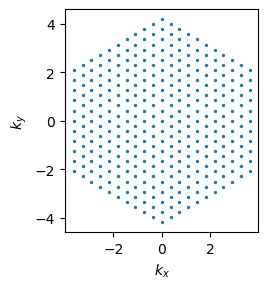

In [331]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [332]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [333]:
h_nonint = ham.generate_non_interacting()

In [334]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

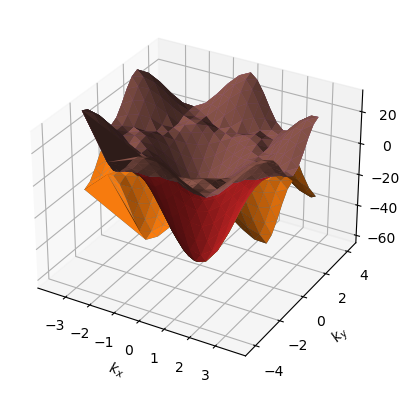

In [335]:
utils_auto.plot_2d_bandstructure(ham,en)

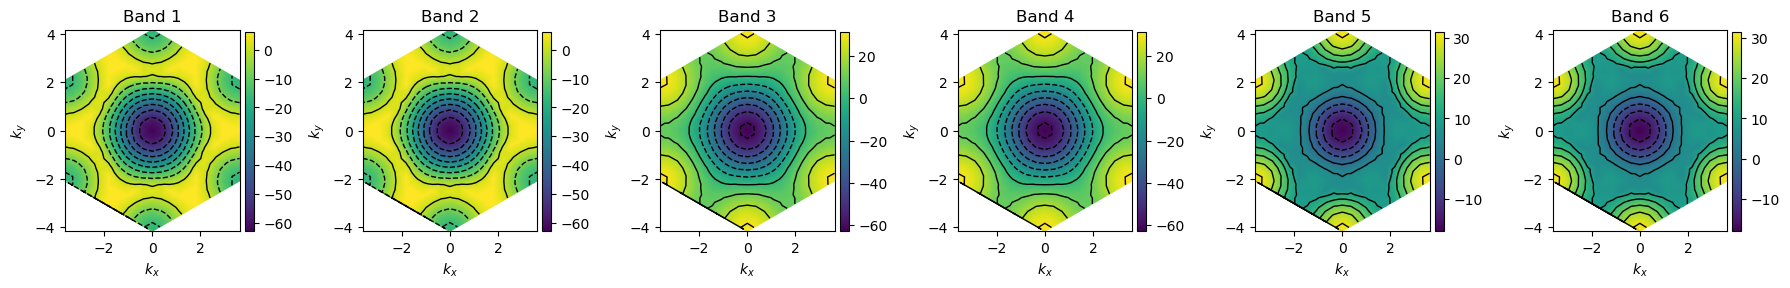

In [336]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [337]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [338]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [339]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

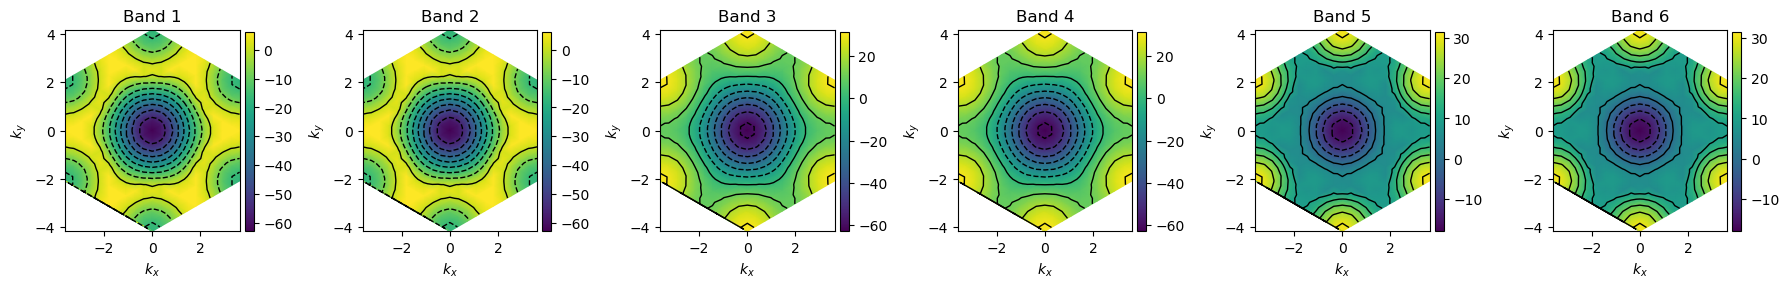

In [340]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [341]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [342]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [343]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

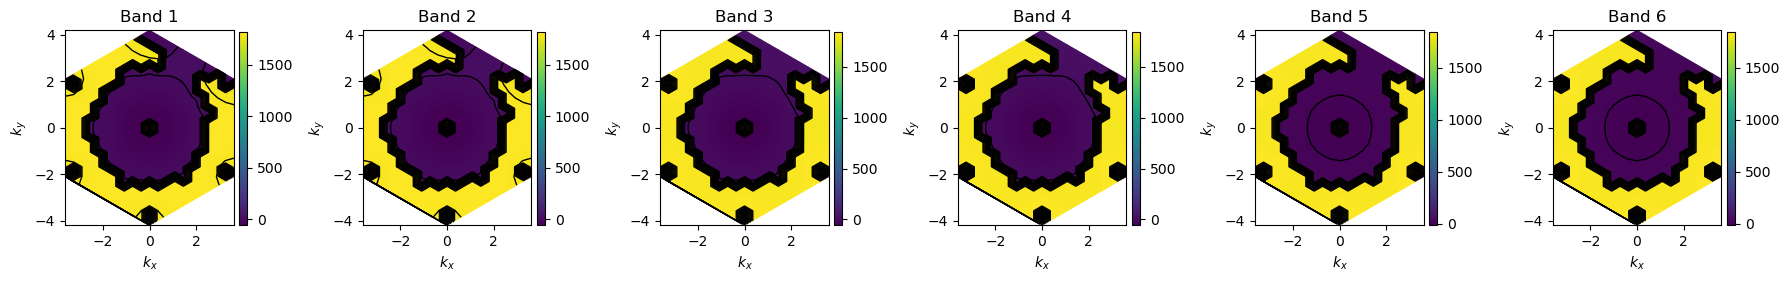

In [344]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [345]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -1877.09
U/T is 24.57
mean_U is 150.61


# Auto eval

## Task 1

In [346]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze
I need to analyze the image according to the given rubric. The rubric asks me to:
1. Check if the image shows a momentum space mesh in the first Brillouin zone of the concerned problem
2. Check the point group symmetry

Let's analyze what I see in the image:

The image shows a 2D plot with axes labeled kx and ky. The plot contains a hexagonal arrangement of points (dots) in k-space. The hexagon is centered at the origin (0,0) and extends approximately from -4 to 4 on the ky axis and from -3 to 3 on the kx axis.

Now, let's connect this to the problem:

The problem deals with a triangular lattice. The first Brillouin zone of a triangular lattice is a hexagon, which is consistent with the shape I see in the image. 

The problem mentions that we're dealing with a "folded Brillouin zone" corresponding to a √3 × √3 superlattice in real space. It states that this folded BZ has reciprocal lattice vector lengths that are 1/

In [347]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [348]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this
Let me analyze this problem carefully. The image shows band structure plots for 6 different bands in the first Brillouin zone of what appears to be a triangular lattice system. The problem asks me to evaluate if these plots correctly represent the expected band structure for the given Hamiltonian.

According to the rubric, I need to analyze several key aspects:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the plots, I can see that the Brillouin zone has a hexagonal shape, which is indeed what we expect for a triangular lattice. The boundaries are clearly defined and form a regular hexagon in all six band plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
- In Bands 1 and 2, the highest energy regions (yellow) are around the corne

In [349]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [350]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze
Let me analyze the image based on the rubric provided for the Hartree-Fock calculation of a triangular lattice. I'll go through each point methodically.

1. Shape of the Brillouin zone:
Looking at the images, I can see that all 6 bands are plotted within a hexagonal Brillouin zone. This hexagonal shape is indeed what's expected for a triangular lattice, so this matches expectations.

2. Symmetry of the energy distribution:
   
2.1 Highest energy regions (yellow):
- In Bands 1 and 2: The highest energy regions (yellow) appear at the corners of the hexagon.
- In Bands 3 and 4: The highest energy regions are also at the corners but with a different energy scale.
- In Bands 5 and 6: The highest energy regions appear to be around the corners again.

2.2 Pattern of energy variation:
All bands show a concentric pattern with energy decreasing from the corners to the center (Γ point) for Bands 1-2, and a more complex pattern in

In [351]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [352]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

I need to analyze
I need to analyze the false color plots showing the interacting-renormalized band structure in the first Brillouin zone after the self-consistent Hartree-Fock calculation. Let's go through the rubric step by step.

1. Shape of the Brillouin zone boundary:
   The image shows 6 panels (Band 1 through Band 6), each displaying a hexagonal Brillouin zone, which is indeed the expected shape for a triangular lattice. The hexagonal boundary is clearly visible in each plot.

2. Symmetry of the energy distribution:

   2.1 Highest energy regions (yellow):
   In all bands, the highest energy regions (yellow) appear at the corners of the hexagonal Brillouin zone. These are typically the K points in a triangular lattice.

   2.2 Pattern of energy variation:
   In all bands, there appears to be a roughly concentric pattern of energy variation, with the lowest energies (dark purple) in the center (Γ point) and increasing outward t

In [353]:
answer4=utils_auto.extract_result_content(result4['text'])

In [354]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '1' saved to final_answer.yaml
